In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.exposure import rescale_intensity

In [2]:
def convolve(image, kernel):
    # grab the spatial dimensions of the image, along with
    # the spatial dimensions of the kernel
    (iH, iW ) = image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    
    # allocate memory for the output image, taking care to
    # "pad" the borders of the input image so the spatial
    # size (i.e., width and height) are not reduced
    pad = int((kW - 1) / 2)
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,cv2.BORDER_REPLICATE)#테두리 영상 늘림,변수,테두리,테두리,테두리,테두리,방식
    
    output = np.zeros((iH, iW), dtype="float32")
    #바꿔줘야함, 지금은 인풋사이즈랑 똑같이 미리 설정이 돼있다.
    #근데 아웃풋사이즈를 스트라이드,패딩값에 맞춰 인풋사이즈랑 항상 같지 않게 조절해야함

    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom    
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1,0]
            #원본이미지에서 곱할 부분 미리뽑아냄 채널3개[x,y,차원]
            #가로 : 0부터 ~ 커널 길이만큼, 세로 : 0부터 커널 높이 만큼 뽑아내야함:수정필요
            
            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()
            
            output[y - pad, x - pad] = k
      
            #store the convolved value in the output (x,y)-
            # coordinate of the output image            
            
            
    
    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")
    
    return output

In [3]:
def run():
    origin = cv2.imread('messi5.jpg')
    kernel = np.ones((5, 5), np.float32)/25#5*5
    dst = convolve(origin, kernel)

    plt.subplot(121), plt.imshow(cv2.cvtColor(origin,cv2.COLOR_BGR2RGB)), plt.title('Original')
    plt.xticks([]), plt.yticks([])
    #plt.subplot(122), plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)), plt.title('Averaging')
    plt.subplot(122), plt.imshow(dst), plt.title('Averaging')
    plt.xticks([]), plt.yticks([])
    plt.show()

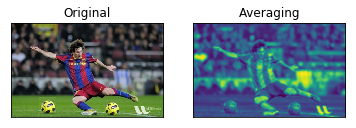

In [4]:
if __name__ == '__main__':
    run()
    